In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Activation function: sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

In [151]:
def l2(output, target):
    derivatives = 2*(output-target)
    loss = (output - target)*(output - target)
    return derivatives, loss

def cross_entropy(output, target):
    derivatives = -target/output + (1-target)/(1-output)
    loss = -(target*np.log(output) + (1-target)*np.log(1-output))
    return derivatives, loss

# batch learning 
def forward(x, W1, W2, predict=False):

    a1 = np.matmul(x, W1)  # pre-activation for the hidden layer 
    z1 = sigmoid(a1)  # output of the hidden layer
    
    # create and add bias
    bias = np.ones((len(z1), 1))
    z1 = np.concatenate((bias, z1), axis=1)  # concatenate bias terms for hidden layer
    a2 = np.matmul(z1, W2)  # pre-activation for the output neuron
    z2 = sigmoid(a2)  # output

    if predict: 
        return z2
    return a1, z1, a2, z2

# Backprop function
def backprop(a2, z0, z1, z2, y):
    # error for ouput layer neurons
    derivatives, loss = l2(z2, y)#z2 - y
    #derivatives, loss = cross_entropy(z2, y)#z2 - y

    # output of the hidden layer x error
    Delta2 = np.matmul(z1.T, derivatives)
    
    # the local gradient for the hidden layer neurons (2 hidden layer neurons)  
    delta1 = (derivatives.dot(W2[1:,:].T))*sigmoid_deriv(a1)  # (4x1)x(1x2)\times(4x2) --> (4x2) 
    
    # inputs x local gradient of hidden layer neurons
    Delta1 = np.matmul(z0.T, delta1)
    
    return loss, Delta1, Delta2

In [152]:
# Define the training data as a numpy array
# First column is bias
X = np.array([[1, 0, 0],
            [1, 0, 1],
            [1, 1, 0],
            [1, 1, 1]])

# The labels for the training data.
y = np.array([[0],
            [1],
            [1],
            [0]])

In [153]:
num_i_units = 3 # Number of Input units (bias included)
num_h_units = 2 # Number of Hidden units
num_o_units = 1 # Number of Output units

# The learning rate for Gradient Descent.
learning_rate = 0.09
# error
costs = []   # an list to record the cost of the NN after each Gradient Descent iteration.

# number of epochs
epochs = 15000

# Number of training examples
m = len(X)

In [154]:
np.random.seed(3420) # set seed for reproducible results
W1 = np.random.randn(num_i_units, num_h_units) # 
W2 = np.random.randn(num_h_units+1,1) # 

In [155]:
for i in range(epochs):

    # Forward propagation
    a1, z1, a2, z2 = forward(X, W1, W2)

    # Back propagation
    delta2, Delta1, Delta2 = backprop(a2, X, z1, z2, y)

    W1 = W1 - learning_rate*(1/m)*Delta1
    W2 = W2 - learning_rate*(1/m)*Delta2

    # Add costs to list for plotting
    c = np.mean(np.abs(delta2))
    costs.append(c)

    if i % 1000 == 0:
        print(f"Iteration: {i}; Error {c}")

# Training complete
print("Training complete.")

Iteration: 0; Error 0.2556926638132738
Iteration: 1000; Error 0.057199506069924154
Iteration: 2000; Error 0.002943532717245195
Iteration: 3000; Error 0.0007965845285258651
Iteration: 4000; Error 0.000353731175564193
Iteration: 5000; Error 0.0001968639124188569
Iteration: 6000; Error 0.0001245772566218099
Iteration: 7000; Error 8.562755331940445e-05
Iteration: 8000; Error 6.234393016967961e-05
Iteration: 9000; Error 4.7355919261416015e-05
Iteration: 10000; Error 3.715790157390823e-05
Iteration: 11000; Error 2.991359318515091e-05
Iteration: 12000; Error 2.4587192925997274e-05
Iteration: 13000; Error 2.0559107059307794e-05
Iteration: 14000; Error 1.7440595872640766e-05
Training complete.


In [156]:
z3 = forward(X, W1, W2, True)
print(f"Percentages:\n {z3}\n")
print(f"Predictions:\n {np.round(z3)}\n")

Percentages:
 [[0.00367235]
 [0.99500928]
 [0.99659695]
 [0.00315238]]

Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]



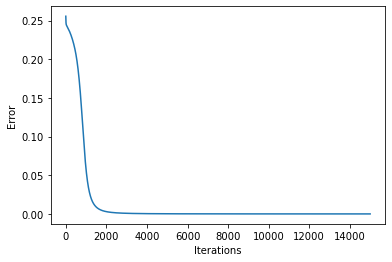

In [157]:
# Assigning the axes to the different elements.
plt.plot(range(epochs), costs)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Error")

# Showing the plot.
plt.show()